# **Importing Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")


# **Loading Dataset**

In [2]:
# Loading the dataset
df = pd.read_csv("Global_Superstore(CSV) Customer segment.csv", encoding='ISO-8859-1')

# Displaying first few rows
df.head()


,ï»¿Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,11/11/2014,11/13/2014,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/2014,2/7/2014,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/2014,10/18/2014,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/2014,1/30/2014,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/2014,11/6/2014,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical


# **EDA**

In [3]:
# Dataset shape and types
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)

# Missing values
print("\nMissing Values:\n", df.isnull().sum())

# Unique segments
print("\nUnique Customer Segments:\n", df['Segment'].value_counts())


Dataset Shape: (1000, 24)

Data Types:
 ï»¿Row ID           int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
Postal Code       float64
City               object
State              object
Country            object
Region             object
Market             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object

Missing Values:
 ï»¿Row ID           0
Order ID            0
Order Date          0
Ship Date           0
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
Postal Code       806
City                0
State               0
Country             0
Region              0
Market            

# **Data Preprocessing**

In [4]:
# Selecting numeric columns for clustering
numeric_cols = ['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']

# Aggregating data by Customer ID
df_grouped = df.groupby(['Customer ID', 'Segment'])[numeric_cols].sum().reset_index()

# Displaying cleaned dataset
df_grouped.head()


,Customer ID,Segment,Sales,Quantity,Discount,Profit,Shipping Cost
0,AA-10480130,Consumer,2645.38,5,0.17,-0.02,452.600
1,AA-1048031,Consumer,1801.60,5,0.00,180.10,241.537
2,AB-100151402,Consumer,576.56,6,0.20,114.34,68.010
3,AB-100151404,Consumer,309.59,7,0.20,15.00,16.700
4,AB-1001527,Consumer,1024.68,8,0.50,-286.92,487.320


# **EDA Visualisations**

**Sales vs Profit by Segment (with Regression Line)**

<Figure size 800x600 with 0 Axes>

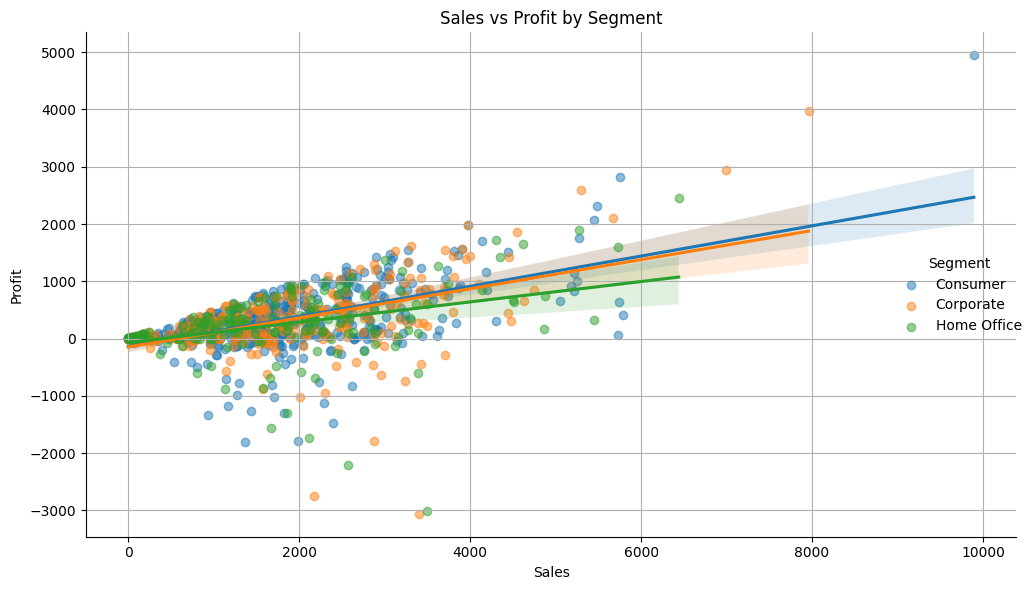

In [5]:
plt.figure(figsize=(8,6))
sns.lmplot(data=df, x='Sales', y='Profit', hue='Segment', height=6, aspect=1.5, scatter_kws={'alpha':0.5})
plt.title('Sales vs Profit by Segment')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.grid(True)
plt.tight_layout()
plt.show()


**Correlation Heatmap of Numerical Features**

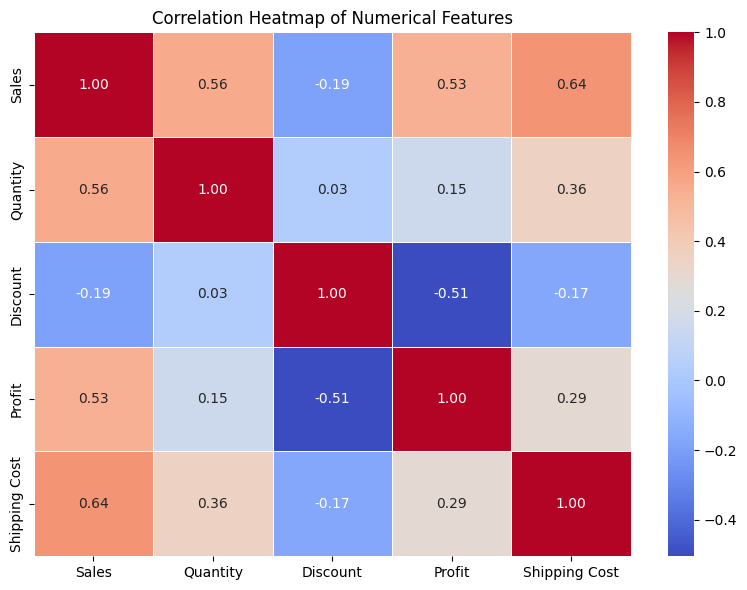

In [6]:
plt.figure(figsize=(8,6))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()


**Average Sales, Profit, and Discount by Region**

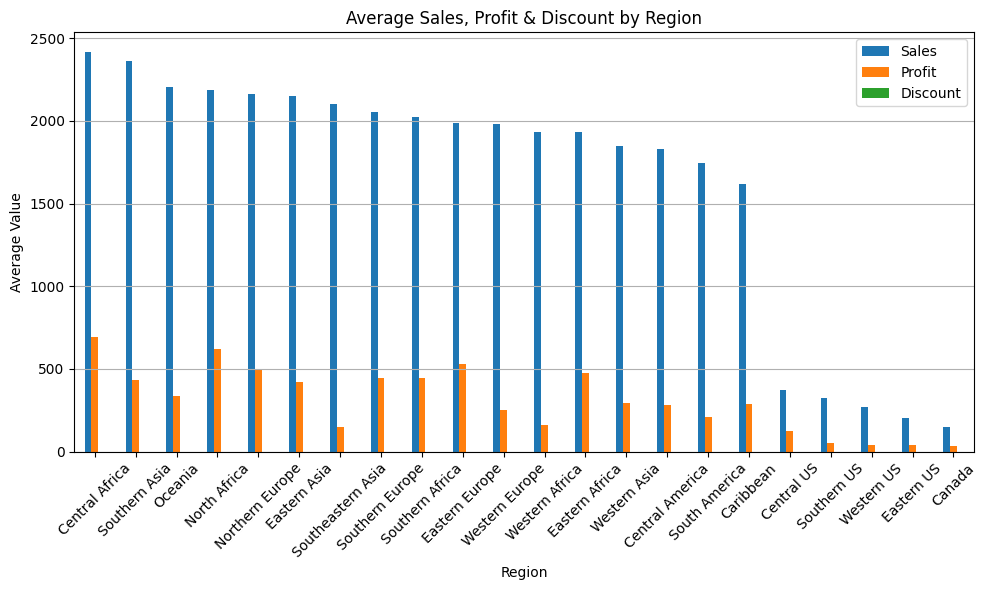

In [7]:
# Aggregated means
region_metrics = df.groupby('Region')[['Sales', 'Profit', 'Discount']].mean().round(2).sort_values('Sales', ascending=False)

# Plotting
region_metrics.plot(kind='bar', figsize=(10,6))
plt.title('Average Sales, Profit & Discount by Region')
plt.ylabel('Average Value')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# **Feature Scaling**

In [8]:
# Extracting features for clustering
X = df_grouped[numeric_cols]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# **Finding Optimal Clusters (Elbow + Silhouette Method)**

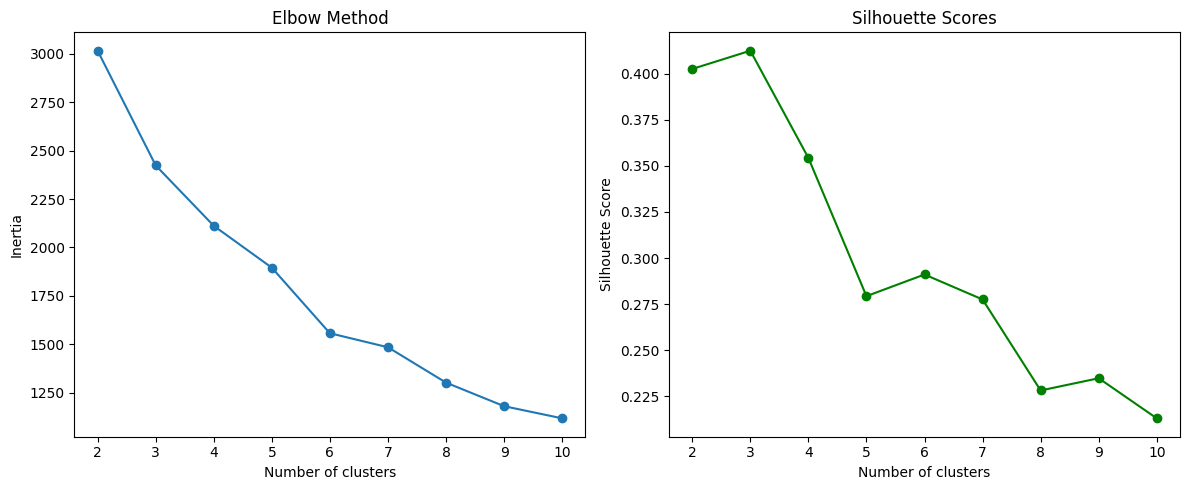

In [9]:
# Elbow method
inertia = []
silhouette = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled, kmeans.labels_))

# Plotting
plt.figure(figsize=(12, 5))

# Elbow Plot
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

# Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette, marker='o', color='green')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


# **Applying K-Means Clustering**

In [10]:
# Applying K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
df_grouped['Cluster'] = kmeans.fit_predict(X_scaled)

# Viewing cluster distribution
df_grouped['Cluster'].value_counts()


,count
Cluster,
0,544
1,195
2,48
3,13


# **Visualizing Clusters**

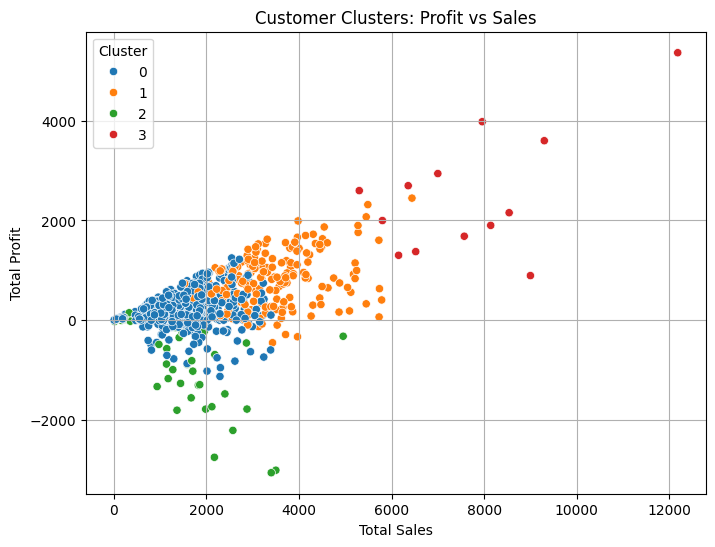

In [11]:
# Plotting cluster by Profit vs Sales
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_grouped, x='Sales', y='Profit', hue='Cluster', palette='tab10')
plt.title('Customer Clusters: Profit vs Sales')
plt.xlabel('Total Sales')
plt.ylabel('Total Profit')
plt.grid(True)
plt.show()


# **Analyzing Clusters**

In [12]:
# Cluster-wise mean
cluster_summary = df_grouped.groupby('Cluster')[numeric_cols].mean()
print(cluster_summary)

# Adding segment label to see distribution
segment_cluster = df_grouped.groupby(['Segment', 'Cluster']).size().unstack()
print(segment_cluster)


               Sales   Quantity  Discount       Profit  Shipping Cost
Cluster                                                              
0        1602.114596   5.494485  0.074743   241.023199     276.050028
1        3425.885077   8.441026  0.055949   815.774974     511.819646
2        1490.692292  14.312500  0.791042  -703.080000     211.931833
3        7678.485385  18.153846  0.253846  2498.118462     941.240231
Cluster        0    1   2  3
Segment                     
Consumer     285  100  19  4
Corporate    159   59  17  7
Home Office  100   36  12  2


# **Adding Cluster Labels to Original Dataset**

In [13]:
# Merging cluster labels back to the original data
df_with_clusters = pd.merge(df, df_grouped[['Customer ID', 'Cluster']], on='Customer ID', how='left')

# Displaying first few rows of the new dataframe
df_with_clusters.head()


,ï»¿Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Cluster
0,40098,CA-2014-AB10015140-41954,11/11/2014,11/13/2014,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,0
1,26341,IN-2014-JR162107-41675,2/5/2014,2/7/2014,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical,1
2,25330,IN-2014-CR127307-41929,10/17/2014,10/18/2014,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium,1
3,13524,ES-2014-KM1637548-41667,1/28/2014,1/30/2014,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium,1
4,47221,SG-2014-RH9495111-41948,11/5/2014,11/6/2014,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical,1


# **Analyzing Purchasing Patterns of Each Cluster**

In [14]:
# Aggregating metrics per cluster
cluster_behavior = df_with_clusters.groupby('Cluster')[['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']].mean().round(2)

# Displaying behavior
print("Purchasing Patterns per Cluster:")
print(cluster_behavior)


Purchasing Patterns per Cluster:
           Sales  Quantity  Discount  Profit  Shipping Cost
Cluster                                                    
0        1531.72      5.25      0.07  230.43         263.92
1        2726.72      6.72      0.04  649.29         407.37
2         477.02      4.58      0.25 -224.99          67.82
3        2772.79      6.56      0.09  902.10         339.89


# **Cluster-wise Segment Distribution (Demographics vs Behavioral Clusters)**

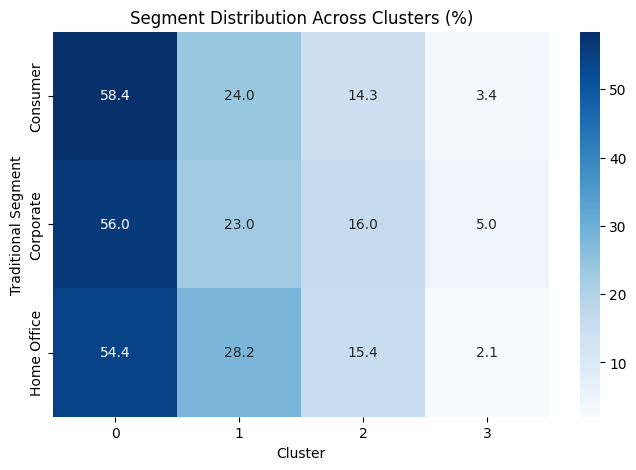

In [15]:
# Cross-tab of traditional 'Segment' vs Clusters
segment_vs_cluster = pd.crosstab(df_with_clusters['Segment'], df_with_clusters['Cluster'], normalize='index') * 100

# Displaying as heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(segment_vs_cluster, annot=True, cmap='Blues', fmt=".1f")
plt.title('Segment Distribution Across Clusters (%)')
plt.ylabel('Traditional Segment')
plt.xlabel('Cluster')
plt.show()


# **Profile & Description for Each Cluster for Marketing Strategy**

In [16]:
# Getting descriptive profile
for i in range(4):  # Assuming 4 clusters
    print(f"\n--- Cluster {i} Profile ---")
    subset = df_with_clusters[df_with_clusters['Cluster'] == i]
    print("Total Customers:", subset['Customer ID'].nunique())
    print("Top Regions:", subset['Region'].value_counts().head(3).to_dict())
    print("Top Categories:", subset['Category'].value_counts().head(3).to_dict())
    print("Avg. Discount:", round(subset['Discount'].mean(), 2))
    print("Avg. Sales:", round(subset['Sales'].mean(), 2))
    print("Avg. Profit:", round(subset['Profit'].mean(), 2))



--- Cluster 0 Profile ---
Total Customers: 544
Top Regions: {'Western Europe': 83, 'Oceania': 62, 'Central America': 58}
Top Categories: {'Technology': 243, 'Furniture': 207, 'Office Supplies': 119}
Avg. Discount: 0.07
Avg. Sales: 1531.72
Avg. Profit: 230.43

--- Cluster 1 Profile ---
Total Customers: 195
Top Regions: {'Western Europe': 42, 'Eastern Asia': 31, 'Oceania': 30}
Top Categories: {'Technology': 111, 'Furniture': 75, 'Office Supplies': 59}
Avg. Discount: 0.04
Avg. Sales: 2726.72
Avg. Profit: 649.29

--- Cluster 2 Profile ---
Total Customers: 48
Top Regions: {'Eastern US': 49, 'Western US': 39, 'Central US': 26}
Top Categories: {'Office Supplies': 88, 'Furniture': 32, 'Technology': 30}
Avg. Discount: 0.25
Avg. Sales: 477.02
Avg. Profit: -224.99

--- Cluster 3 Profile ---
Total Customers: 13
Top Regions: {'Central US': 11, 'Eastern Asia': 7, 'Southern Asia': 6}
Top Categories: {'Office Supplies': 13, 'Furniture': 12, 'Technology': 11}
Avg. Discount: 0.09
Avg. Sales: 2772.79
Av

# **Visualizing Feature Importance Across Clusters**

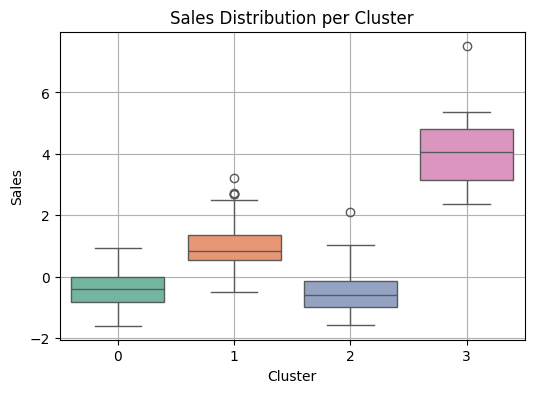

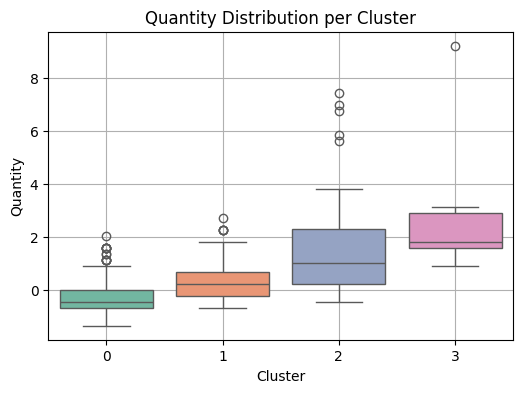

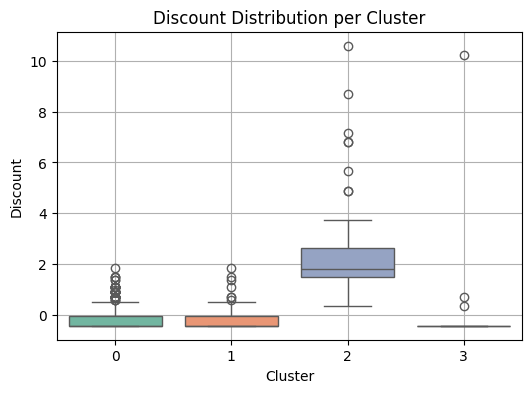

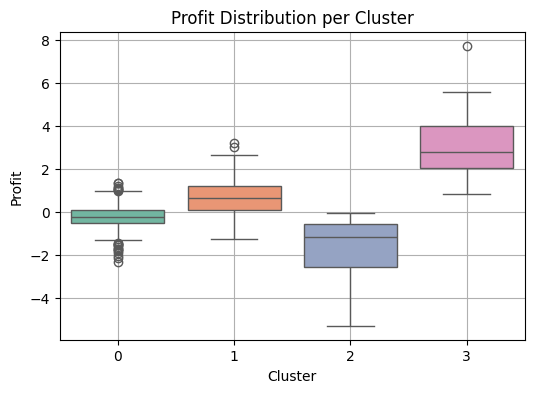

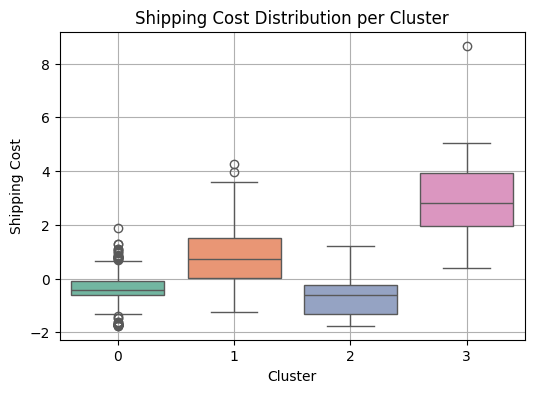

In [17]:
# Adding cluster labels back to scaled data for boxplot visualization
X_df_scaled = pd.DataFrame(X_scaled, columns=numeric_cols)
X_df_scaled['Cluster'] = df_grouped['Cluster']

# Plotting distributions
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Cluster', y=col, data=X_df_scaled, palette='Set2')
    plt.title(f'{col} Distribution per Cluster')
    plt.grid(True)
    plt.show()
